# 1. 강의영상 

{{<video https://youtu.be/playlist?list=PLQqh36zP38-z03THS4jG11HPcozk3ZfVS&si=Ry49nDAOI3PSu0Ja >}}

# 2. Imports 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model

# 3. 데이터 불러오기

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/main/posts/employment.csv')
df_train

,toeic,gpa,employment
0,135,0.051535,0
1,935,0.355496,0
2,485,2.228435,0
3,65,1.179701,0
4,445,3.962356,1
...,...,...,...
495,280,4.288465,1
496,310,2.601212,1
497,225,0.042323,0
498,320,1.041416,0


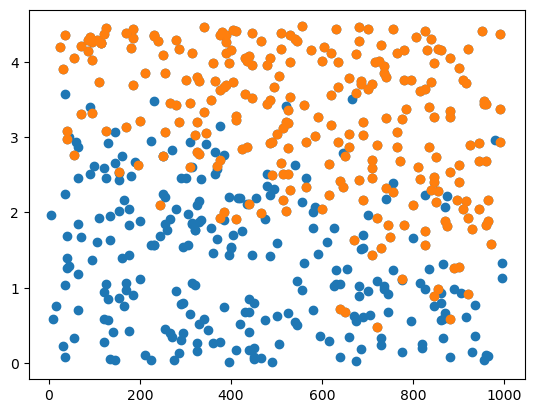

In [4]:
plt.plot(df_train.toeic,df_train.gpa,'o')
df_filtered = df_train[df_train.employment==1]
plt.plot(df_filtered.toeic,df_filtered.gpa,'o')

# 4. 분석 

## A. 데이터 정리 

In [5]:
X = pd.get_dummies(df_train[['toeic','gpa']])
y = df_train[['employment']]

In [6]:
X

,toeic,gpa
0,135,0.051535
1,935,0.355496
2,485,2.228435
3,65,1.179701
4,445,3.962356
...,...,...
495,280,4.288465
496,310,2.601212
497,225,0.042323
498,320,1.041416


## B. Predictor ($\star\star\star$)

`-` 여기가 중요함. $y$가 연속형이 아니라 범주형으로 이루어진 경우는 `sklearn.linear_model.LogisticRegression()` 이용하여 predictor를 만들 것

In [7]:
predictr = sklearn.linear_model.LogisticRegression()

## C. 학습

In [8]:
predictr.fit(X,y)

/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

## D. 예측 

In [9]:
predictr.predict(X) 

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,

## E. 평가 

In [10]:
predictr.score(X,y)

0.882

In [11]:
(predictr.predict(X) == y.employment).mean()

0.882

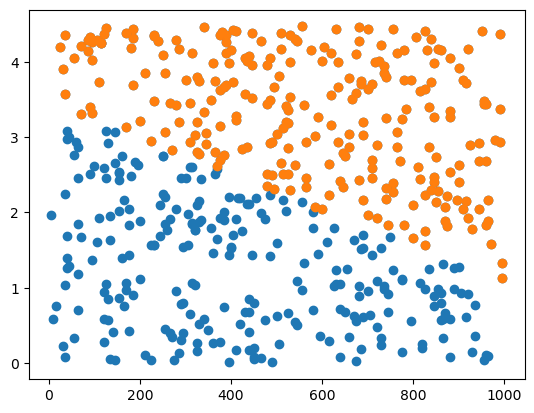

In [12]:
plt.plot(df_train.toeic,df_train.gpa,'o')
df_filtered = df_train[predictr.predict(X)==1]
plt.plot(df_filtered.toeic,df_filtered.gpa,'o') 

- 이 정도면 합리적임

:::{.callout-important}
### 2023-10-24 추가해설
**오버피팅**: 물론 정확률이 좀 아쉽긴하지만 여기서 더 맞추려고 한다면 오버핏이다. 모형을 개선하는게 의미가 없을것 같다는 판단을 해야함. 
:::